<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Plot the median value of the house prices as a box plot


The mean of the meadian value of houses is $22532.806324110676


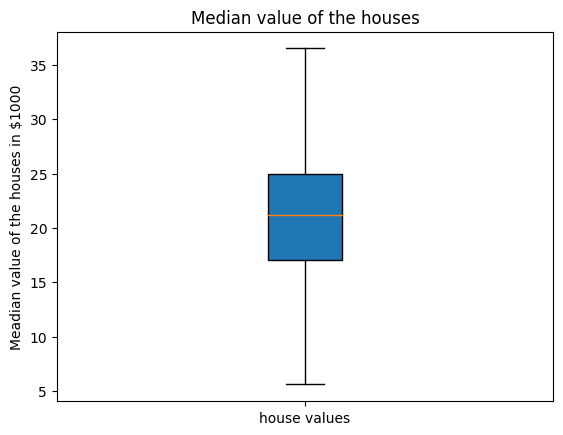

In [9]:
## Plot the median value of the house prices as a box plot
bxplot=plt.boxplot(boston_df['MEDV'] ,vert=True,patch_artist=True,showfliers=False,labels=["house values"])
plt.title("Median value of the houses")
plt.ylabel("Meadian value of the houses in $1000")
print(f"The mean of the meadian value of houses is ${np.mean(boston_df['MEDV'])*1000}")

#### Plot the histogram of the pupil to student ratio data


In [ ]:
## Plot the histogram of the pupil to student ratio data
plt.hist(boston_df['PTRATIO'],bins=10)
plt.ylabel("Number")
plt.xlabel("Student to Pupil ratio")

print(f"The mean student to pupil ratio for all the regions is {np.mean(boston_df['PTRATIO'])}")
print("From the data it is evident that there are more regions with the student to pupil ratio of about 21")


#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? 


------------------------ Question 1  -------------------------------
TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)
Since the p-value=7.390623170519905e-05<0.05, we reject the null hypothesis and conclude there is a statistical difference between the house prices bounded and not bounded by the Charlees river
 --------------------------------------------------------------------


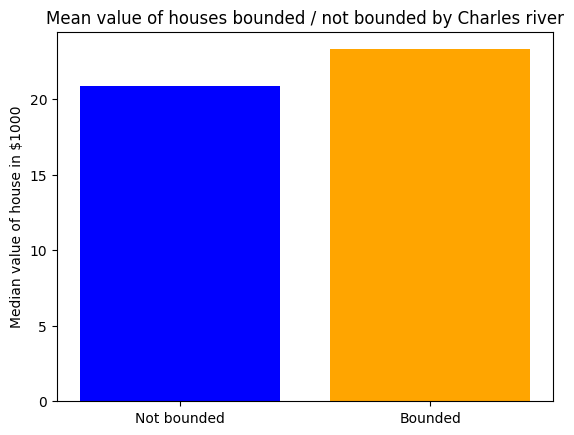

In [14]:

"""
Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? 

Null Hypothesis:
    
    H0 - There is no significant difference between the median house prices bounded by the Charles rive and that not bounded by the Charles river
    
"""    
    
## Sort the data
Hval=boston_df['MEDV'] ## Data of housing values
Chb=boston_df['CHAS'] ## Bounding by the Charles river

## Evaluate median house value of houses bounded by the Charles river
HvChb1=np.median(Hval[Chb==1])

## Evaluate median house value not bounded by Charles river
HvChb0=np.median(Hval[Chb==0])

## Show a bar plot of the data
plt.bar(["Not bounded","Bounded"],[HvChb0,HvChb1],color=["blue","orange"])
plt.ylabel("Median value of house in $1000") 
plt.title('Mean value of houses bounded / not bounded by Charles river')
## Conduct T-test for independet variables
HvChb_Ttest=st.ttest_ind(Hval[Chb==0],Hval[Chb==1])

## Print the test results
print("------------------------ Question 1  -------------------------------")
print(HvChb_Ttest)
print(f"Since the p-value={HvChb_Ttest.pvalue}<0.05, we reject the null hypothesis and conclude there is a statistical difference between the house prices bounded and not bounded by the Charlees river")
print(" --------------------------------------------------------------------")


#### Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?


------------------------ Question 2  -------------------------------
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
Since the p-value=1.7105011022702984e-15<0.05, we reject the null hypothesis and conclude there is a statistical difference between the mean house prices depending on proportion of owner-occupied houses built prior to 1940
 --------------------------------------------------------------------


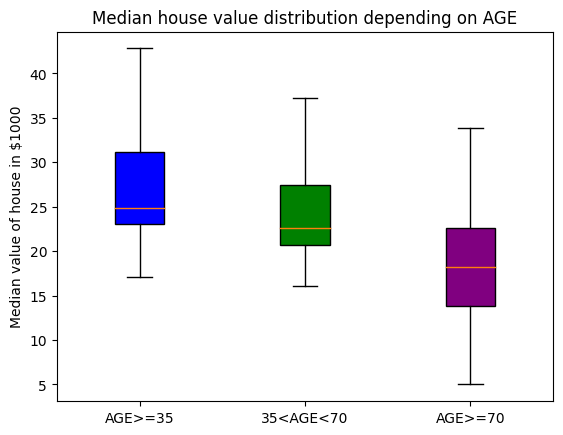

In [15]:
"""
Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Discretization - The proportion of houses built before 1940 is categorised into three groups;

    Group1 - AGE <= 35
    Group2 - 35 < AGE < 70
    Group3 - AGE >= 70

Null Hypothesis:
    
    H0 - There is no difference in median house prices between these groups 
    
"""   

## Gather the age data - proportion of owner-occupied units built prior to 1940
Age=boston_df['AGE'] 

## Gather median value of houses belonging to each of the groups
G1=Hval[Age<=35] 
G2=Hval[(Age>35)&(Age<70)]
G3=Hval[Age>=70]

## Plot a box plot for the data in the three groups
bxplot=plt.boxplot([G1,G2,G3],vert=True,patch_artist=True,showfliers=False,labels=["AGE>=35","35<AGE<70","AGE>=70"])

colors = ['blue', 'green', 'purple']
for i in range(0,3):
    
    bxplot['boxes'][i].set_facecolor(colors[i])

plt.ylabel("Median value of house in $1000")
plt.title("Median house value distribution depending on AGE")

### Conduct the ANOVA test
Atest=st.f_oneway(G1,G2,G3)

## Print the test results
print("------------------------ Question 2  -------------------------------")
print(Atest)
print(f"Since the p-value={Atest.pvalue}<0.05, we reject the null hypothesis and conclude there is a statistical difference between the mean house prices depending on proportion of owner-occupied houses built prior to 1940")
print(" --------------------------------------------------------------------")


#### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?


----------- Plot interpretation---------------
Interpretation of scatter plot: There appears to be a postive trend i.e the non-business acres increases as the NOX levels increase
----------------------------------------------
------------------------ Question 3  -------------------------------
PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
Since the Pearson correlation r=0.7636514469209192, we can say that there is a high degree of positive correlaton between the Nox values and the non-business acreas per town
 --------------------------------------------------------------------


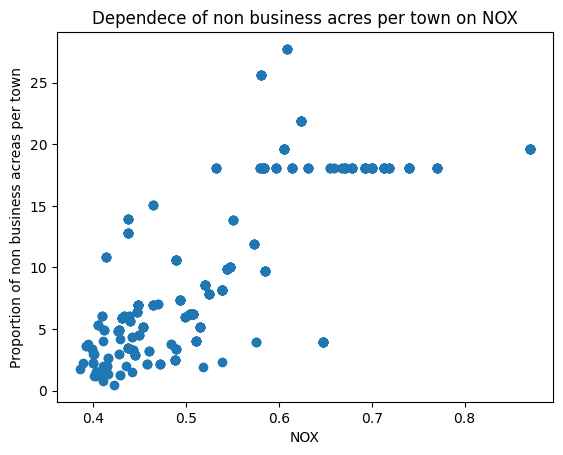

In [16]:

"""
Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

"""   

## Gather the proportion of non business acres per town
Nba=boston_df['INDUS'] 
## Gather the NOX data
nox=boston_df['NOX'] 

### Plot a scatter plot between the two values
plt.scatter(nox,Nba)
plt.xlabel("NOX")
plt.ylabel("Proportion of non business acreas per town")
plt.title("Dependece of non business acres per town on NOX")

## Print the interpretation
print("----------- Plot interpretation---------------")
print("Interpretation of scatter plot: There appears to be a postive trend i.e the non-business acres increases as the NOX levels increase")
print("----------------------------------------------")

## Conduct the pearson correlation test
Ptest=st.pearsonr(nox,Nba)
## Print the test results
print("------------------------ Question 3  -------------------------------")
print(Ptest)
print(f"Since the Pearson correlation r={Ptest[0]}, we can say that there is a high degree of positive correlaton between the Nox values and the non-business acreas per town")
print(" --------------------------------------------------------------------")



#### Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [17]:

"""
Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

"""   

## Gather the distance to the employment centers
X=boston_df['DIS']
 
## Data of housing values
y=boston_df['MEDV'] 

## Add the constant for the linear model
X=sm.add_constant(X)
## Fit the model to the data
model=sm.OLS(y,X).fit()
prediction=model.predict(X)

## Print the test results
print("------------------------ Question 4  -------------------------------")
print(model.summary())
print("\n")
print(f"The correlation coefficient is r={np.sqrt(model.rsquared)}. This suggests a weak but still a positive correlation.")
print("Thus, the meadian value of houses increase very slightly as the distance from the employment center increases")
print(" --------------------------------------------------------------------")


------------------------ Question 4  -------------------------------
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        21:16:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------